### UNDERSTANDING THE DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from scipy import stats
from scipy.stats import chi2_contingency 


In [3]:
data = pd.read_csv('heart_2022_with_nans.csv')
df = data.copy()

In [4]:
# dropping duplicate value in present.

print(df.duplicated().sum())

157


In [5]:
df.shape

(445132, 40)

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
# iam dropping column with most unique values. state.

df.drop(columns = ['State'], axis = 1, inplace = True)

In [8]:
df.duplicated().sum()

1536

In [9]:
# finding null value percentage.
df.isnull().sum()/len(df)*100

Sex                           0.000000
GeneralHealth                 0.268105
PhysicalHealthDays            2.454520
MentalHealthDays              2.036519
LastCheckupTime               1.865498
PhysicalActivities            0.244508
SleepHours                    1.224338
RemovedTeeth                  2.551829
HadHeartAttack                0.687679
HadAngina                     0.988820
HadStroke                     0.348784
HadAsthma                     0.397326
HadSkinCancer                 0.705208
HadCOPD                       0.497556
HadDepressiveDisorder         0.630822
HadKidneyDisease              0.431710
HadArthritis                  0.590595
HadDiabetes                   0.243160
DeafOrHardOfHearing           4.607450
BlindOrVisionDifficulty       4.813529
DifficultyConcentrating       5.414911
DifficultyWalking             5.363672
DifficultyDressingBathing     5.341873
DifficultyErrands             5.733131
SmokerStatus                  7.936626
ECigaretteUsage          

In [10]:
# columns with more than 10% null values

columns_na = [print(f'column_name: {i} data_type: {df[i].dtypes}') for i in df.columns if df[i].isnull().sum()/len(df)*100 > 10]

column_name: ChestScan data_type: object
column_name: BMI data_type: float64
column_name: AlcoholDrinkers data_type: object
column_name: HIVTesting data_type: object
column_name: FluVaxLast12 data_type: object
column_name: PneumoVaxEver data_type: object
column_name: TetanusLast10Tdap data_type: object
column_name: HighRiskLastYear data_type: object
column_name: CovidPos data_type: object


In [11]:
# understanding the data types present in the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        444975 non-null  object 
 1   GeneralHealth              443782 non-null  object 
 2   PhysicalHealthDays         434053 non-null  float64
 3   MentalHealthDays           435913 non-null  float64
 4   LastCheckupTime            436674 non-null  object 
 5   PhysicalActivities         443887 non-null  object 
 6   SleepHours                 439527 non-null  float64
 7   RemovedTeeth               433620 non-null  object 
 8   HadHeartAttack             441915 non-null  object 
 9   HadAngina                  440575 non-null  object 
 10  HadStroke                  443423 non-null  object 
 11  HadAsthma                  443207 non-null  object 
 12  HadSkinCancer              441837 non-null  object 
 13  HadCOPD                    442761 

In [12]:
# columns with numeric data types.

num_col = df.select_dtypes(include = np.number).columns.tolist()
print(len(num_col))
num_col

6


['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

In [13]:
# columns with categorical columns

cat_col = df.select_dtypes(include = 'object').columns.tolist()
print(len(cat_col))
cat_col

33


['Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
# checking if the data types for the columns are assigned correctly and makes sense.

df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [16]:
# some columns need feature engineering but if encoding is considered then we can move on without them.

In [17]:
# finding the unique values in both the numeric and categorical columns

In [18]:
# unique values in the numeric columns

for i in num_col:
    print('******************')
    print(f'column_name: {i}\n values: {df[i].unique}')

******************
column_name: PhysicalHealthDays
 values: <bound method Series.unique of 0          0.0
1          0.0
2          2.0
3          0.0
4          2.0
          ... 
445127     0.0
445128     2.0
445129    30.0
445130     0.0
445131     0.0
Name: PhysicalHealthDays, Length: 444975, dtype: float64>
******************
column_name: MentalHealthDays
 values: <bound method Series.unique of 0          0.0
1          0.0
2          3.0
3          0.0
4          0.0
          ... 
445127     3.0
445128     2.0
445129    30.0
445130     0.0
445131     1.0
Name: MentalHealthDays, Length: 444975, dtype: float64>
******************
column_name: SleepHours
 values: <bound method Series.unique of 0         8.0
1         6.0
2         5.0
3         7.0
4         9.0
         ... 
445127    6.0
445128    7.0
445129    5.0
445130    5.0
445131    5.0
Name: SleepHours, Length: 444975, dtype: float64>
******************
column_name: HeightInMeters
 values: <bound method Series.unique of 0 

### STATS ANALYSIS

#### FIVE POINT SUMMARY FOR CATEGORICAL AND NUMERICAL COLUMNS

In [21]:
# numerical column

df[num_col].describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434053.000000,435913.000000,439527.000000,416470.000000,403044.000000,396316.000000
mean,4.349372,4.384164,7.022909,1.702690,83.074632,28.529907
std,8.689968,8.388541,1.502618,0.107178,21.448241,6.554917
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [22]:
# for categorical column

df[cat_col].describe()

,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,444975,443782,436674,443887,433620,441915,440575,443423,443207,441837,442761,442168,443054,442347,443893,424473,423556,420880,421108,421205,419464,409659,409461,389075,430927,435906,398547,378994,398000,368081,362605,394498,394357
unique,2,5,4,2,4,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,4,4,2,5,13,2,2,2,2,4,2,3
top,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,235823,148372,350799,337411,233323,416807,414024,424185,376516,406358,407105,350758,422739,291211,368573,385528,399898,370780,353029,404392,387017,245949,311978,223215,320294,47084,210881,249911,209246,215600,121489,377313,270045


## **EDA**

### ***UNIVARIATE ANALYSIS***

In [25]:
len(num_col)

6

#### Before doing null value treatment and outlier treatment

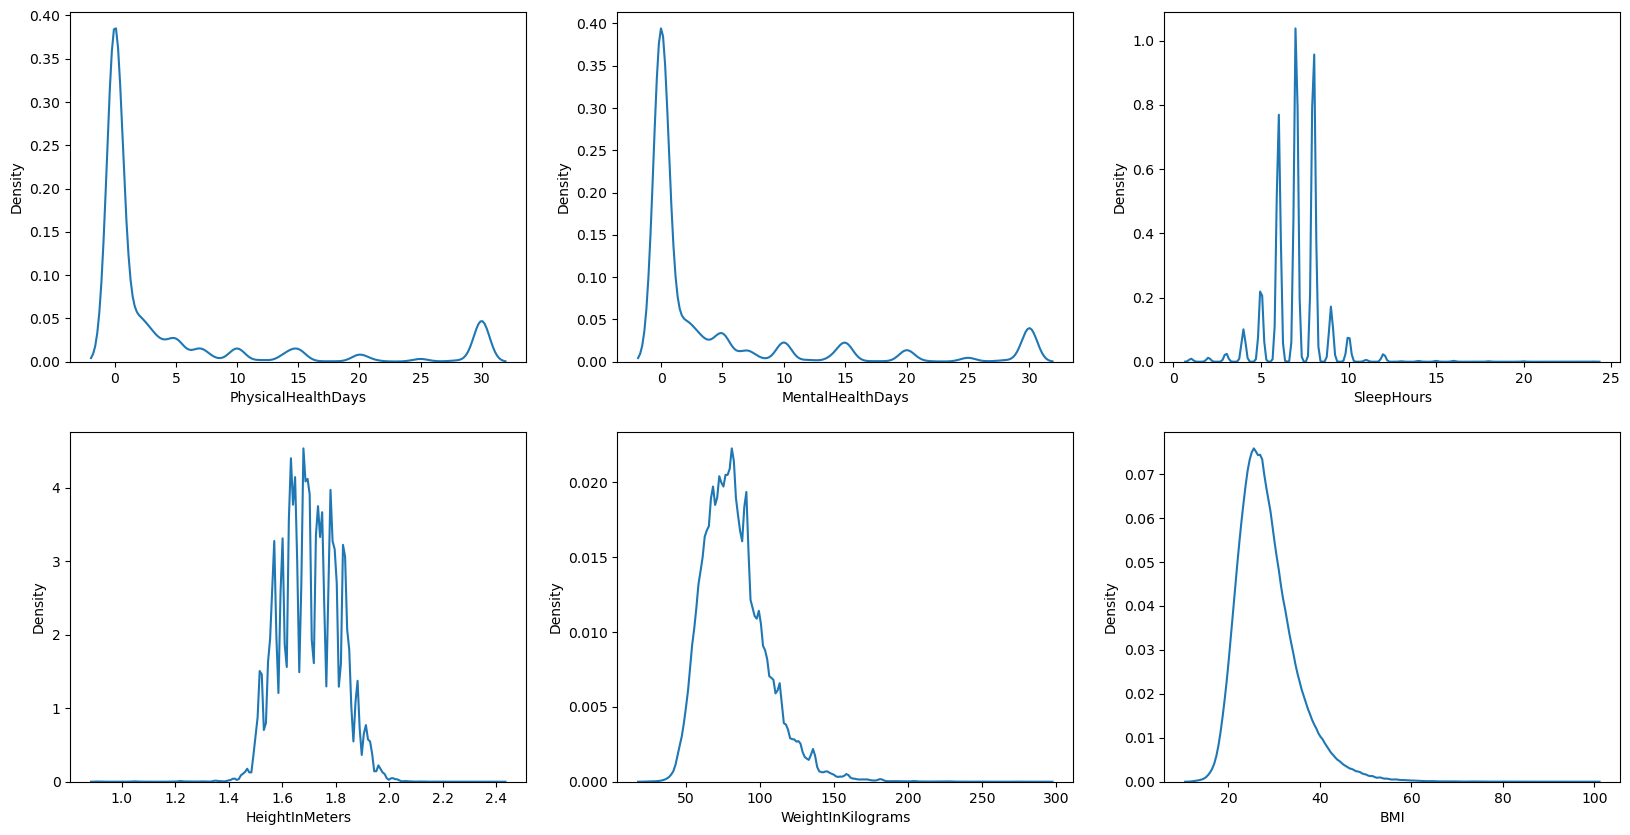

<Figure size 640x480 with 0 Axes>

In [27]:
# numerical columns

plt.figure(figsize = [20, 10])

t = 1

for i in num_col:
    plt.subplot(2,3,t)
    sns.kdeplot(x = df[i])
    t += 1
plt.show()
plt.tight_layout()

#### After doing null value treatment and outlier treatment

In [29]:
# null value treatment.

# for numerical columns,
# median: for columns with more than 10% null value
# mean: for columns less than 10% null value

In [30]:
df[num_col].isnull().sum()/len(df)*100

PhysicalHealthDays     2.454520
MentalHealthDays       2.036519
SleepHours             1.224338
HeightInMeters         6.405978
WeightInKilograms      9.423226
BMI                   10.935221
dtype: float64

In [31]:
for i in num_col:
    if (df[i].isnull().sum()/len(df)*100) > 10:
        df.loc[df[i].isnull(), i] = df[i].fillna(df[i].median())
    else:
        df.loc[df[i].isnull(), i] = df[i].fillna(df[i].mean())

In [32]:
df[num_col].isnull().sum()

PhysicalHealthDays    0
MentalHealthDays      0
SleepHours            0
HeightInMeters        0
WeightInKilograms     0
BMI                   0
dtype: int64

In [33]:
# for categorical columns
# mode: for all categorical columns

In [34]:
df[cat_col].isnull().sum()/len(df)*100

Sex                           0.000000
GeneralHealth                 0.268105
LastCheckupTime               1.865498
PhysicalActivities            0.244508
RemovedTeeth                  2.551829
HadHeartAttack                0.687679
HadAngina                     0.988820
HadStroke                     0.348784
HadAsthma                     0.397326
HadSkinCancer                 0.705208
HadCOPD                       0.497556
HadDepressiveDisorder         0.630822
HadKidneyDisease              0.431710
HadArthritis                  0.590595
HadDiabetes                   0.243160
DeafOrHardOfHearing           4.607450
BlindOrVisionDifficulty       4.813529
DifficultyConcentrating       5.414911
DifficultyWalking             5.363672
DifficultyDressingBathing     5.341873
DifficultyErrands             5.733131
SmokerStatus                  7.936626
ECigaretteUsage               7.981123
ChestScan                    12.562504
RaceEthnicityCategory         3.157031
AgeCategory              

In [35]:
for i in cat_col:
    df.loc[df[i].isnull(), i] = df[i].fillna(df[i].mode()[0])

In [36]:
df[cat_col].isnull().sum()

Sex                          0
GeneralHealth                0
LastCheckupTime              0
PhysicalActivities           0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusLast10Tdap            0
HighRiskLastYear             0
CovidPos

In [37]:
# with this the null values are treated for both numerical and categorical values.

In [38]:
# now checking the skew for the numerical columns after null value treatment.

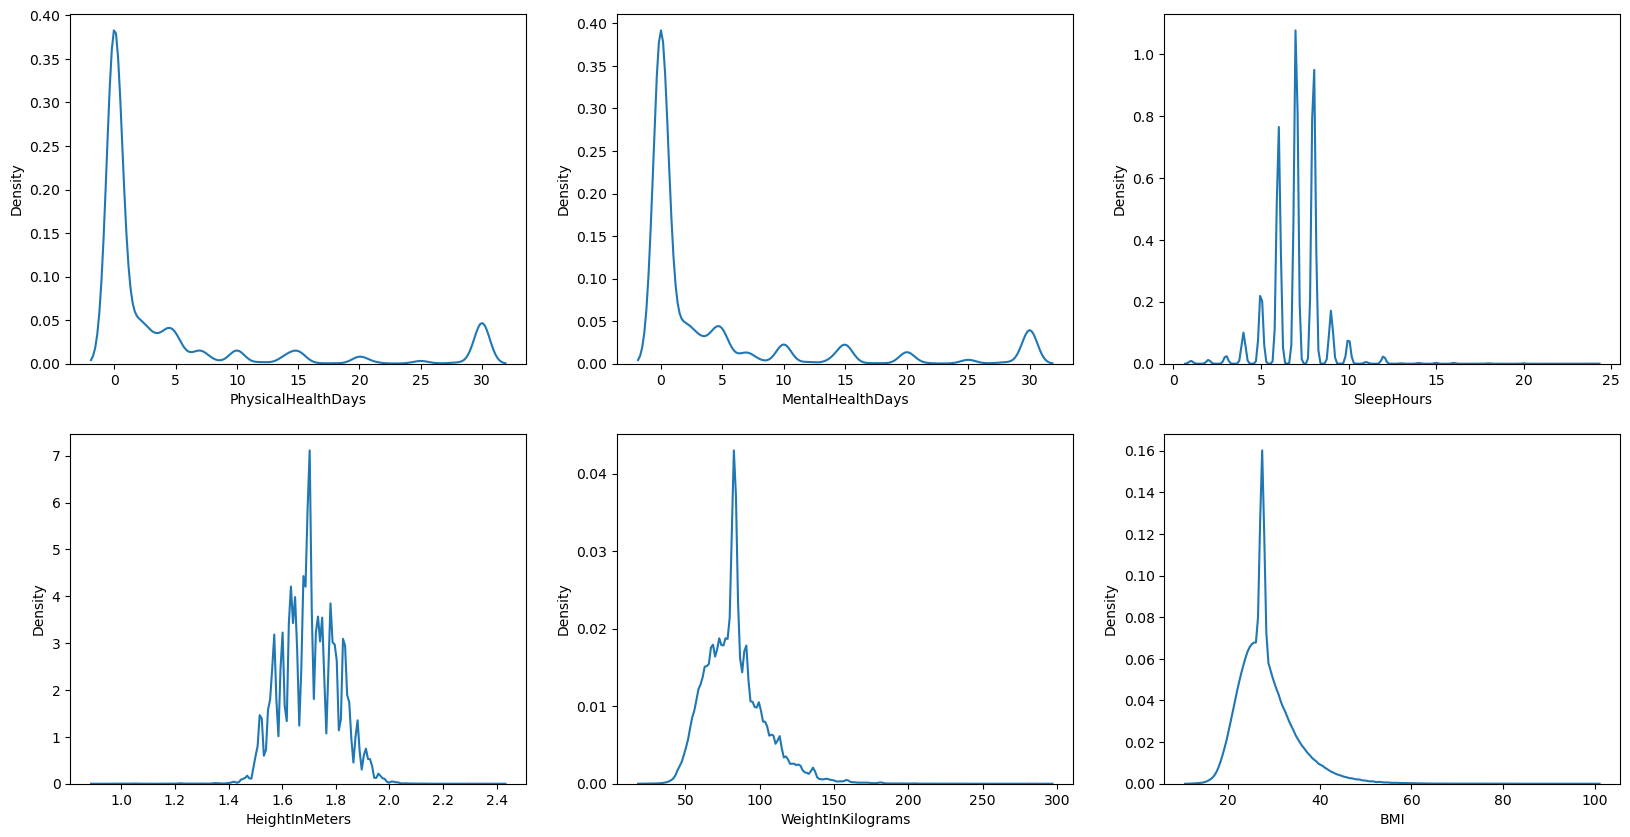

<Figure size 640x480 with 0 Axes>

In [39]:
# numerical columns

plt.figure(figsize = [20, 10])

t = 1

for i in num_col:
    plt.subplot(2,3,t)
    sns.kdeplot(x = df[i])
    t += 1
plt.show()
plt.tight_layout()

In [40]:
# the skewness hasnt changed much at all
# Now then, Moving on to outlier treatement

### Now doing boxplot to identify outliers

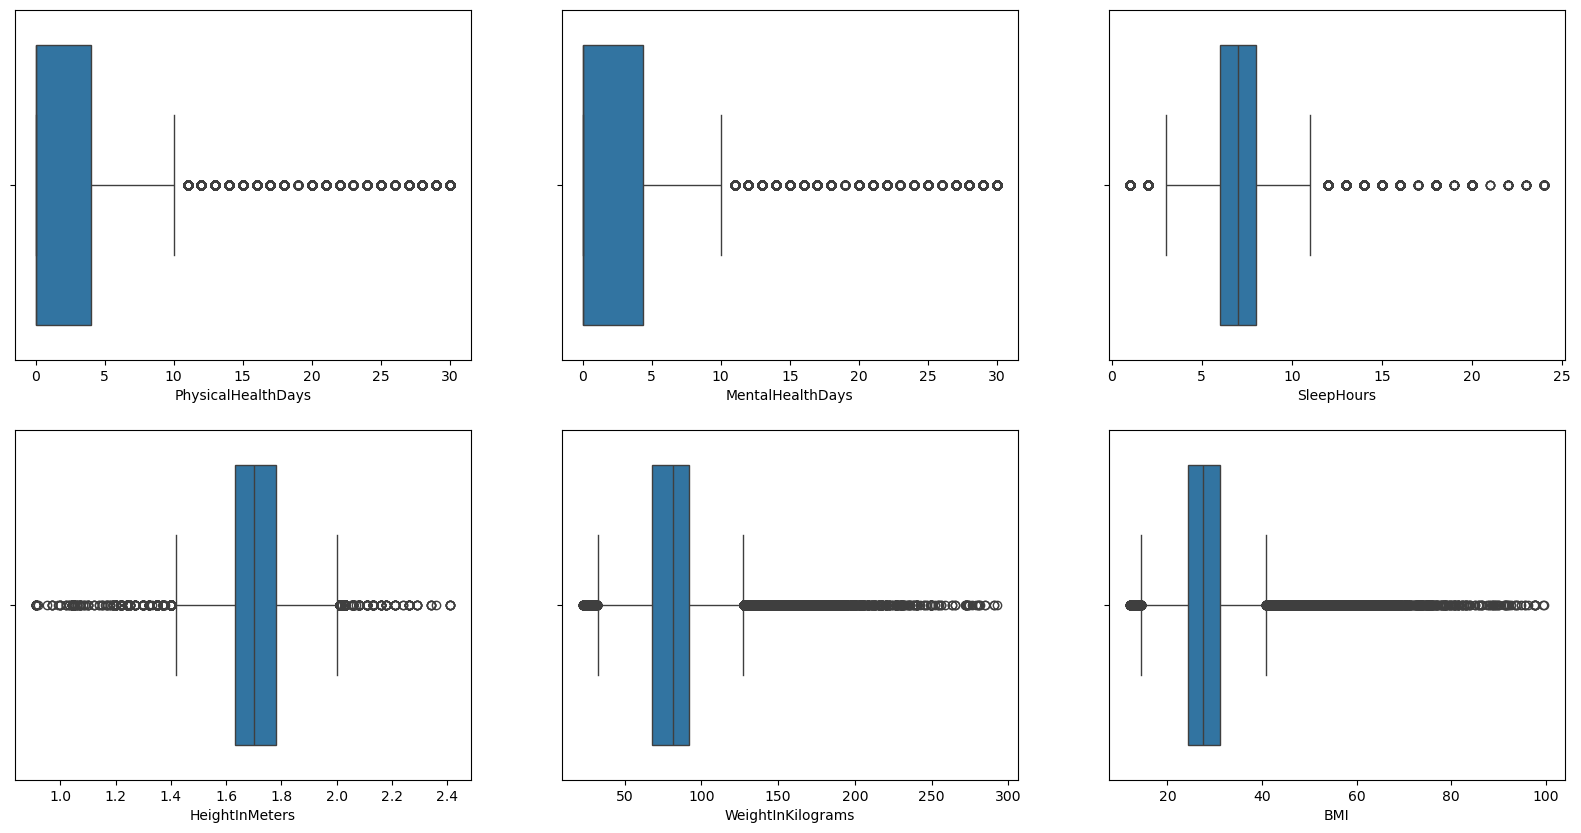

<Figure size 640x480 with 0 Axes>

In [42]:
# numerical columns

plt.figure(figsize = [20, 10])

t = 1

for i in num_col:
    plt.subplot(2,3,t)
    sns.boxplot(x = df[i])
    t += 1
plt.show()
plt.tight_layout()

In [43]:
# iam using iqr(inter quartile range) method to treat the outliers

In [44]:
def outlier_presence(i):
    q1 = np.quantile(df[i], 0.25)
    q3 = np.quantile(df[i], 0.75)
    iqr = q3 - q1
    lower = q1 - (iqr*1.5)
    upper = q3 + (iqr*1.5)
    lower_outlier = df[i][df[i] < lower].head()
    upper_outlier = df[i][df[i] > upper].head()
    return lower_outlier, upper_outlier

In [45]:
outlier_presence('HeightInMeters')

(555     1.24
 874     1.22
 902     1.22
 1588    1.30
 2374    1.22
 Name: HeightInMeters, dtype: float64,
 1534    2.03
 1551    2.01
 2249    2.01
 4831    2.01
 5289    2.11
 Name: HeightInMeters, dtype: float64)

In [46]:
def remove_outliers(i):
    q1 = np.quantile(df[i], 0.25)
    q3 = np.quantile(df[i], 0.75)
    iqr = q3 - q1
    lower = q1 - (iqr*1.5)
    upper = q3 + (iqr*1.5)
    no_outlier_df = df[i].apply(lambda x: x if lower <= x <= upper else np.nan)
    return no_outlier_df

In [47]:
# iam using df1 a copy of the copied dataframe df

In [48]:
df1 = df.copy()

In [49]:
for i in num_col:
    df1[i] = remove_outliers(i)

In [50]:
df1.dropna(inplace = True)

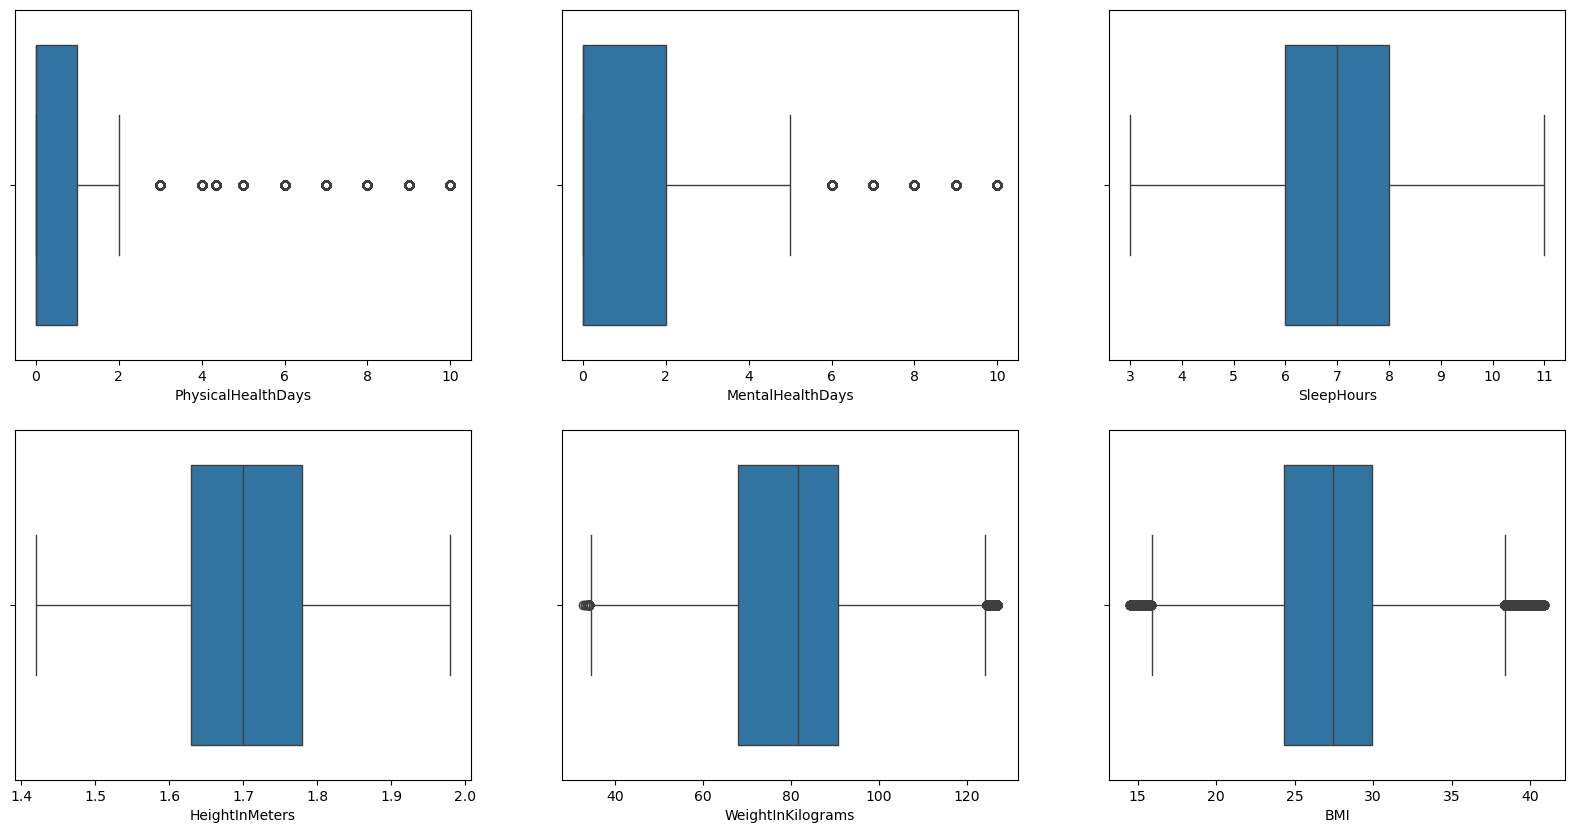

<Figure size 640x480 with 0 Axes>

In [51]:
# numerical columns

plt.figure(figsize = [20, 10])

t = 1

for i in num_col:
    plt.subplot(2,3,t)
    sns.boxplot(x = df1[i])
    t += 1
plt.show()
plt.tight_layout()

In [52]:
# capping the rest of the outlier values

In [53]:
def cap_values(i):
    q1 = np.quantile(df1[i], 0.25)
    q3 = np.quantile(df1[i], 0.75)
    iqr = q3 - q1
    lower = q1 - (iqr*1.5)
    upper = q3 + (iqr*1.5)
    df1[i] = df1[i].clip(lower, upper)
    return df1[i]

In [54]:
for i in num_col:
    df1[i] = cap_values(i)

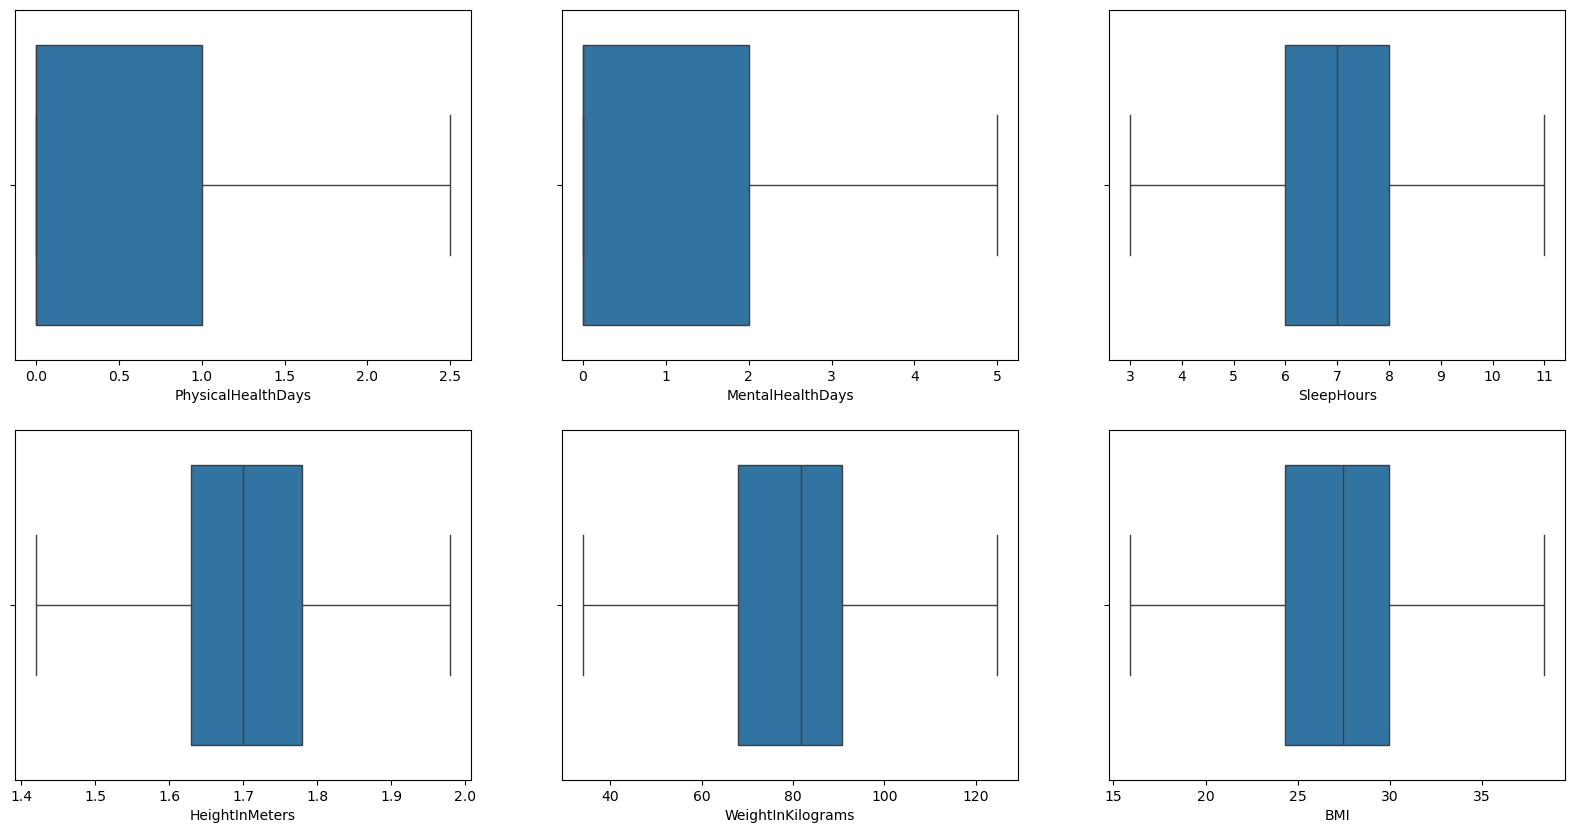

<Figure size 640x480 with 0 Axes>

In [55]:
# numerical columns

plt.figure(figsize = [20, 10])

t = 1

for i in num_col:
    plt.subplot(2,3,t)
    sns.boxplot(x = df1[i])
    t += 1
plt.show()
plt.tight_layout()

In [56]:
# we have created a new dataframe where null values and outliers are treated.

In [57]:
df1.shape

(326429, 39)

In [58]:
df.shape

(444975, 39)

In [59]:
# the no of rows has been reduced from
# 444975 to 326429

In [60]:
# now to continuing univariate and bivariate analysis.

#### After doing null value treatment and outlier treatment

In [62]:
# skew plot for numerical columns

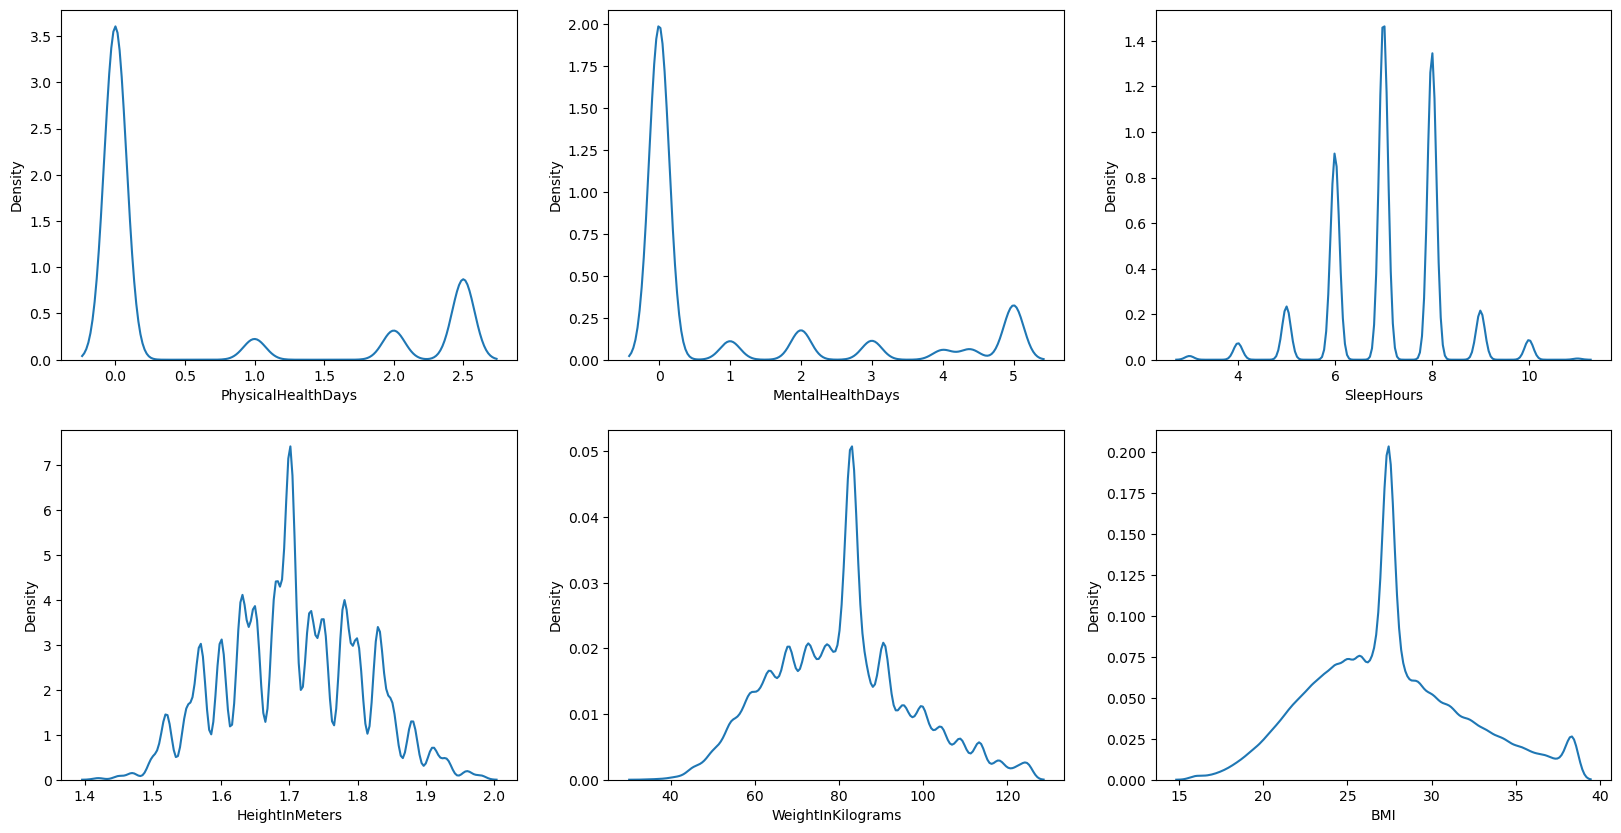

<Figure size 640x480 with 0 Axes>

In [63]:
# numerical columns

plt.figure(figsize = [20, 10])

t = 1

for i in num_col:
    plt.subplot(2,3,t)
    sns.kdeplot(x = df1[i])
    t += 1
plt.show()
plt.tight_layout()

2.206516911418538


<Axes: ylabel='Density'>

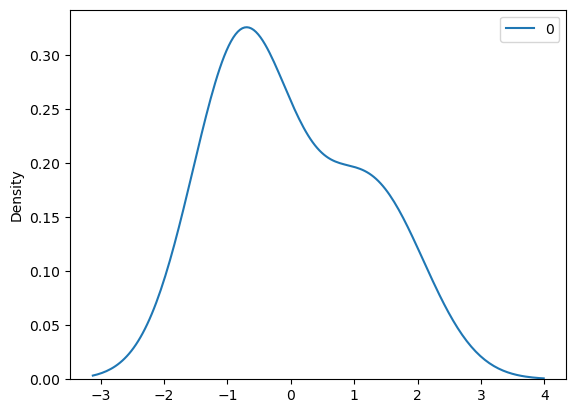

In [64]:
# check

from sklearn.preprocessing import PowerTransformer

yj = PowerTransformer(method = 'yeo-johnson')

print(df['PhysicalHealthDays'].skew())
sns.kdeplot(yj.fit_transform(df[['PhysicalHealthDays']]), bw_adjust = 10.5)

In [65]:
print('skew of physical health days before', df['PhysicalHealthDays'].skew(), 'after', df1['PhysicalHealthDays'].skew())

skew of physical health days before 2.206516911418538 after 1.1696544643022144


skew is  0.06625369143587644


<Axes: xlabel='HeightInMeters', ylabel='Count'>

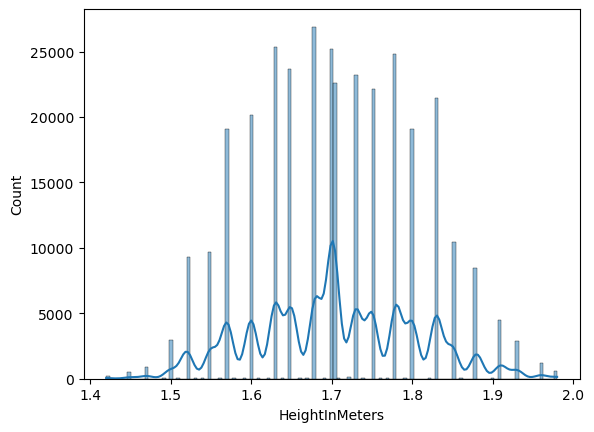

In [66]:
# check

sc = StandardScaler()

print('skew is ', df1['HeightInMeters'].skew())
sns.histplot(df1['HeightInMeters'], kde = True) 

<Axes: xlabel='HeightInMeters', ylabel='Density'>

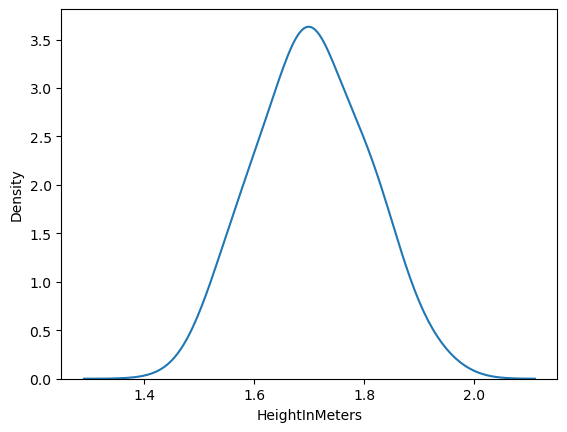

In [67]:
sns.kdeplot(df1['HeightInMeters'], bw_adjust = 5.5) 

In [68]:
# check

# for categorical columns

cat_col

['Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [69]:
len(cat_col)

33

C:\Users\persi\AppData\Local\Temp\ipykernel_12468\1528091870.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HadHeartAttack', data=df, palette=['blue', 'orange'])


<Axes: xlabel='HadHeartAttack', ylabel='count'>

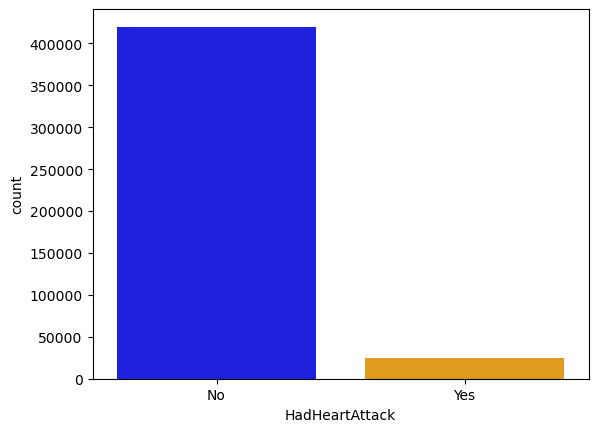

In [70]:
sns.countplot(x='HadHeartAttack', data=df, palette=['blue', 'orange'])

C:\Users\persi\AppData\Local\Temp\ipykernel_12468\1840460577.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HadCOPD', data=df, palette=['blue', 'orange'])


<Axes: xlabel='HadCOPD', ylabel='count'>

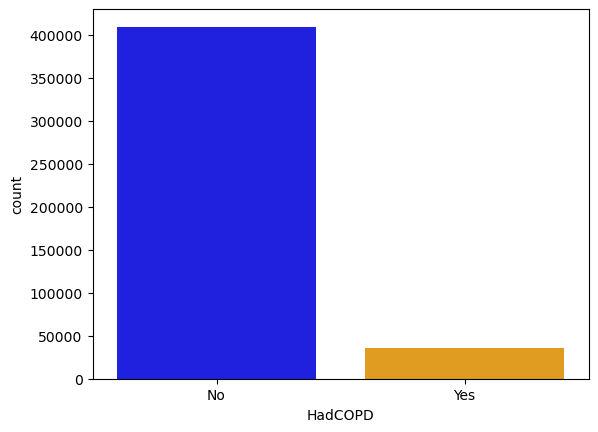

In [71]:
sns.countplot(x='HadCOPD', data=df, palette=['blue', 'orange'])

In [72]:
df['HadCOPD'].value_counts(normalize = True)*100

HadCOPD
No     91.986966
Yes     8.013034
Name: proportion, dtype: float64

In [73]:
df['SmokerStatus'].value_counts(normalize = True)*100

SmokerStatus
Never smoked                             63.209169
Former smoker                            25.567504
Current smoker - now smokes every day     8.091016
Current smoker - now smokes some days     3.132311
Name: proportion, dtype: float64

<Axes: ylabel='count'>

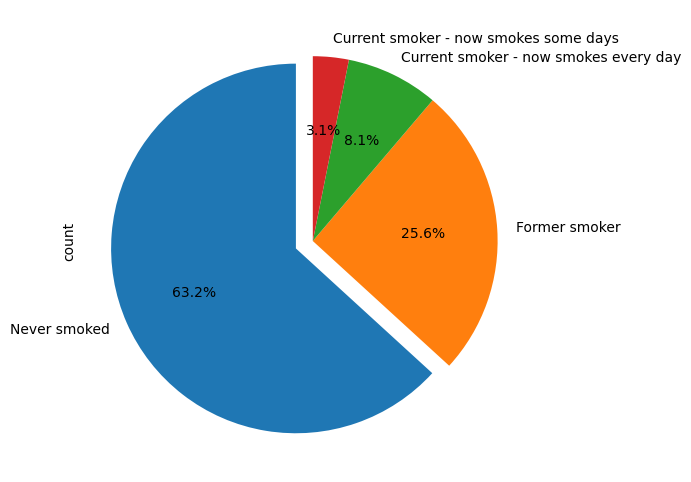

In [74]:
df['SmokerStatus'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', startangle =90, figsize = (6,6), explode = [0.1,0,0,0])

<Axes: ylabel='count'>

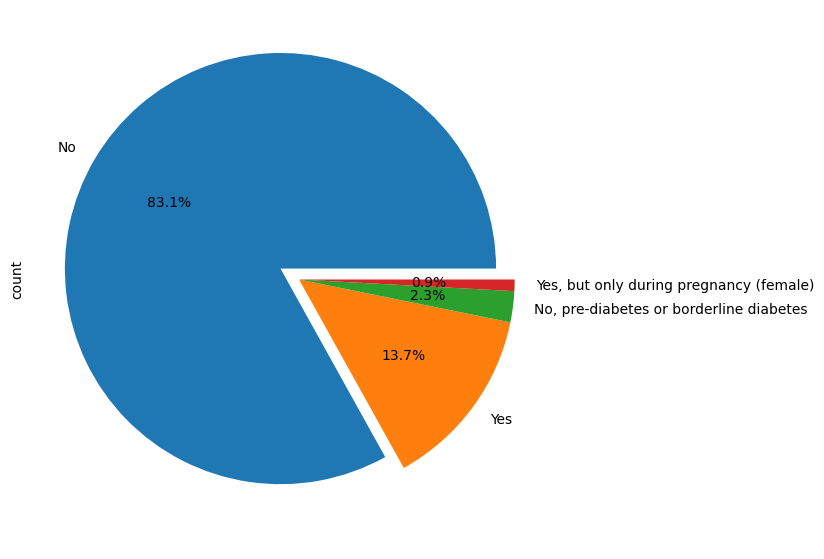

In [75]:
df['HadDiabetes'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', figsize = (7, 7), explode = [0.1, 0, 0, 0])

In [76]:
cat_col

['Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [77]:
df['ECigaretteUsage'].value_counts()

ECigaretteUsage
Never used e-cigarettes in my entire life    347492
Not at all (right now)                        75367
Use them some days                            11734
Use them every day                            10382
Name: count, dtype: int64

<Axes: ylabel='count'>

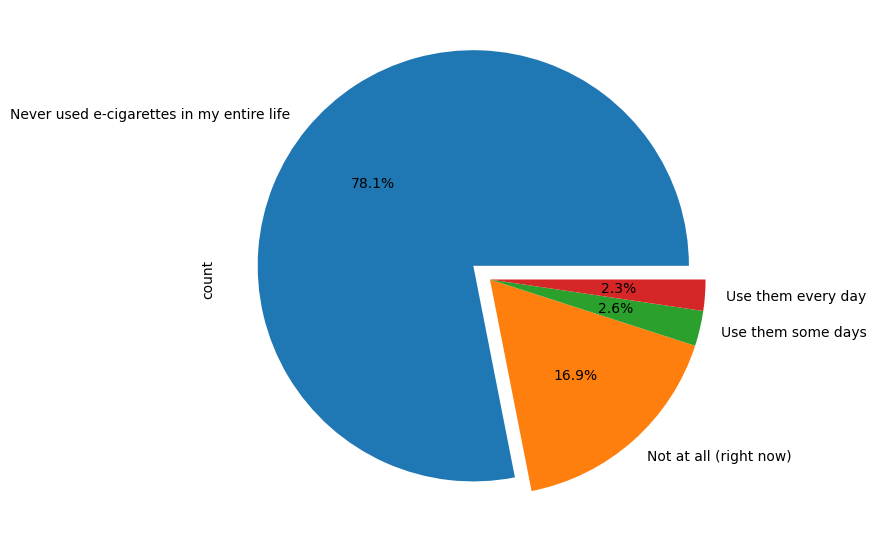

In [78]:
df['ECigaretteUsage'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', figsize = (7,7), explode = [0.1,0,0,0])

### BIVARIATE ANALYSIS

#### NUMERICAL VS NUMERICAL

In [81]:
# iam going to create a correlation plot for all the numerical columns present in the dataset.

In [82]:
df[num_col].corr()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
PhysicalHealthDays,1.000000,0.313429,-0.054311,-0.048709,0.068579,0.105870
MentalHealthDays,0.313429,1.000000,-0.126010,-0.047448,0.038083,0.071655
SleepHours,-0.054311,-0.126010,1.000000,-0.014032,-0.050360,-0.047235
HeightInMeters,-0.048709,-0.047448,-0.014032,1.000000,0.455631,-0.024413
WeightInKilograms,0.068579,0.038083,-0.050360,0.455631,1.000000,0.850107
BMI,0.105870,0.071655,-0.047235,-0.024413,0.850107,1.000000


<Axes: >

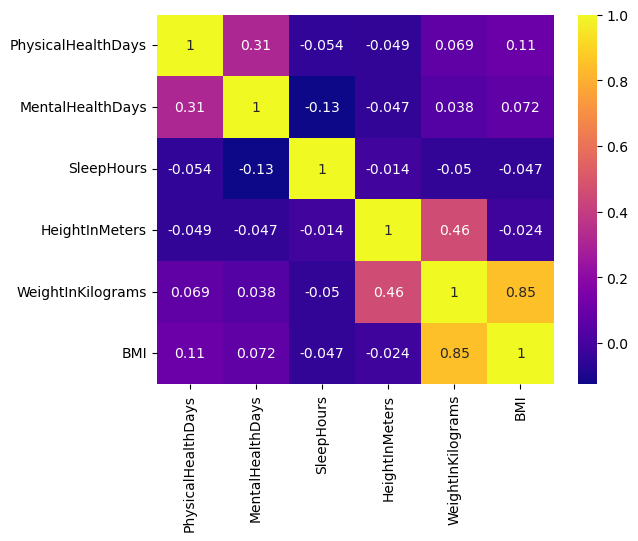

In [83]:
sns.heatmap(df[num_col].corr(), annot = True, cmap = 'plasma')

In [84]:
# as expected height in meters and weight in kilograms are comparitively shows high correlation.
# also weight in kilograms and bmi shows high correlation.

### Numerical vs Numerical (pearsonr test)

In [86]:
# h0: There is no linear relation between the two columns ( pvalue < 0.5) ( we reject null hypothesis)
# h1: there is a linear relation between the two columns ( pvalue > 0.5) ( we fail to reject null hypothesis)  (i.e alternate hypothesis)

In [87]:
stats.pearsonr(df['WeightInKilograms'], df['BMI'])

PearsonRResult(statistic=0.8501071813755396, pvalue=0.0)

In [88]:
# The statistics ( r value ) 0.8 meaning there is a high correlation and the p value is 0.0 meaning we reject null hypothesis.

In [89]:
# h0: columns weight in kilograms and bmi are not highly correlated
# h1: columns weight in kilograms and bmi are highly correlated.

In [90]:
# lets check for other columns that were shown to be highly correlated in the heatmap.

In [91]:
stats.pearsonr(df['WeightInKilograms'], df['HeightInMeters'])

PearsonRResult(statistic=0.45563134013869755, pvalue=0.0)

In [92]:
# again we reject null hypothesis meaning
# there is a correlation between the columns weight in kilgorams and height in meters. 
# though this is less when compared with bmi column, Still there is a correlation.

In [93]:
num_col

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

In [94]:
stats.pearsonr(df['SleepHours'], df['MentalHealthDays'])

PearsonRResult(statistic=-0.12600977181917966, pvalue=0.0)

In [95]:
# we reject null hypothesis here

# the correlation is very less compared to other columns.But still there is some correlation.

### NUMERICAL VS CATEGORICAL

In [97]:
# based on gathered domain knowledge iam taking the  most sensible numerical columns to be tested against the 
# categorical column 'had heart attack' which is also my target column.

In [98]:
# of the six numerical columns i have chosen.

# Physical health days,
# Mental health days,
# BMI,
# sleep hours

In [99]:
# Physical health days vs had heart attack

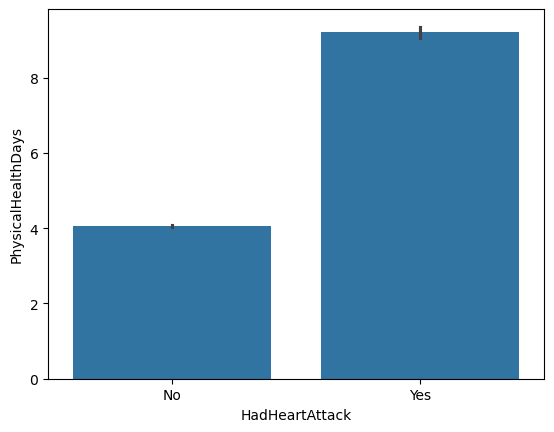

In [100]:
sns.barplot(x = df['HadHeartAttack'], y = df['PhysicalHealthDays'])
plt.show()

In [101]:
# Mental health days vs had heart attack

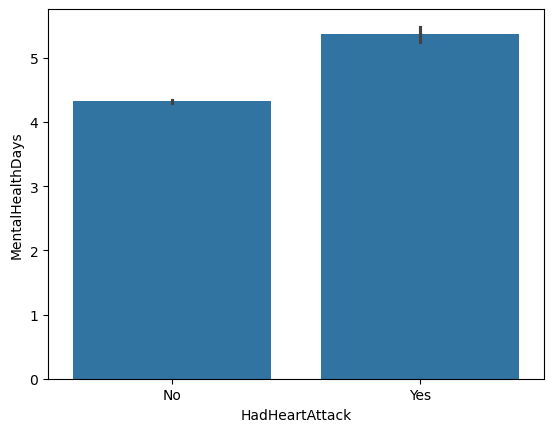

In [102]:
sns.barplot(x = df['HadHeartAttack'], y = df['MentalHealthDays'])
plt.show()

In [103]:
# Sleep hours vs had heart attack

In [104]:
import matplotlib.gridspec as gridspec

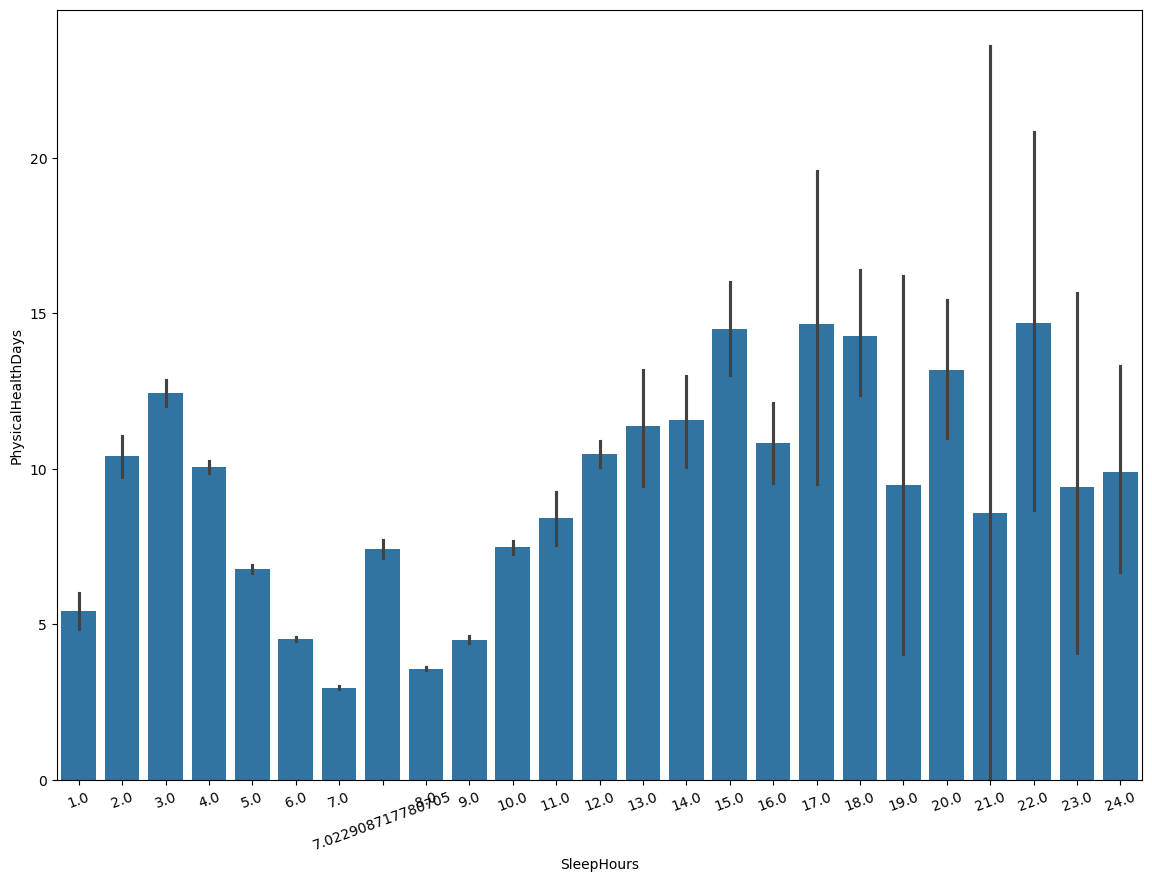

In [105]:
fig = plt.figure(figsize = (14, 10))
gs = gridspec.GridSpec(2,3)
axs = fig.add_subplot(gs[0:])
sns.barplot(x = df['SleepHours'], y = df['PhysicalHealthDays'])
axs.tick_params(axis = 'x', rotation = 20)
plt.show()

#### STATS ANALYSIS

In [107]:
# performin ttest for smoke status and heart attack

In [108]:
# checking whether the mean are the same or not using ttest_1samp

In [109]:
num_col

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

In [110]:
# plotting sleep hours for had heart attack

In [111]:
g1 = df['SleepHours'][df['HadHeartAttack'] == 'Yes']
g2 = df['SleepHours'][df['HadHeartAttack'] == 'No']

print(len(g1), len(g2))

stats_value, pvalue = stats.levene(g1, g2)
print(stats_value)
print(pvalue)

25108 419867
2379.0618493219736
0.0


In [112]:
result = stats.ttest_ind(g1, g2, equal_var = False)
print(result)

TtestResult(statistic=2.0111923889418066, pvalue=0.044315106352780124, df=26871.605806730087)


In [113]:


# Define group_1 and group_2 based on the 'HadHeartAttack' column
group_1 = df['SleepHours'][df['HadHeartAttack'] == 'Yes']
group_2 = df['SleepHours'][df['HadHeartAttack'] == 'No']

# Remove NaN values (if any)
# group_1 = group_1.dropna()
# group_2 = group_2.dropna()

# Check lengths of groups to make sure they are not empty
print(len(group_1), len(group_2))

# Perform Levene's Test for equal variances
stat, p_value = stats.levene(group_1, group_2)
print('Levene Test Statistic:', stat)
print('p-value:', p_value)


25108 419867
Levene Test Statistic: 2379.0618493219736
p-value: 0.0


In [114]:
stats.ttest_ind(group_1, group_2, equal_var = True)

TtestResult(statistic=2.5609051794878472, pvalue=0.010440311366611443, df=444973.0)

### CATEGORICAL VS CATEGORICAL

In [116]:
# for visualisation we can go with count plot and for stats we can do chi squared test.

In [117]:
# countplot visualizaton.

In [118]:
cat_col

['Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [119]:
# too many categorical columns, First lets do chi squared and then we shall go with visualisation.

#### CHI_SQUARE TESTING FOR CATEGORICAL COLUMN

#### stats analysis

In [122]:
# h0: the variables are independent.
# h1: the variables are dependent.

In [123]:
value_dict = {'column_name': [],
            'stats_value': [],
            'pvalue': [],
             'statement': []}
for i in cat_col:
    if i != 'HadHeartAttack':
        corr_value = pd.crosstab(df[i], df['HadHeartAttack'])
        stats, pvalue, dof, expected = chi2_contingency(corr_value)
        value_dict['column_name'].append(i)
        value_dict['stats_value'].append(stats)
        value_dict['pvalue'].append(pvalue)
        if pvalue < 0.05:
            # reject null hypothesis
            # values are dependent
            state1 = 'dependent'
            value_dict['statement'].append(state1)
        else:
            state2 = 'independent'
            value_dict['statement'].append(state2)

value_dict_df = pd.DataFrame(value_dict)

In [124]:
value_dict_df

,column_name,stats_value,pvalue,statement
0,Sex,2214.332224,0.000000e+00,dependent
1,GeneralHealth,17811.165572,0.000000e+00,dependent
2,LastCheckupTime,2080.023758,0.000000e+00,dependent
3,PhysicalActivities,3215.007718,0.000000e+00,dependent
4,RemovedTeeth,12545.228296,0.000000e+00,dependent
5,HadAngina,81513.984779,0.000000e+00,dependent
6,HadStroke,15125.139680,0.000000e+00,dependent
7,HadAsthma,344.272200,7.489939e-77,dependent
8,HadSkinCancer,1212.106248,1.426542e-265,dependent
9,HadCOPD,8829.151433,0.000000e+00,dependent


In [125]:
chi2_contingency(pd.crosstab(df['CovidPos'], df['HadHeartAttack']))

Chi2ContingencyResult(statistic=324.5041592757566, pvalue=3.4262349110478484e-71, dof=2, expected_freq=array([[302569.38439463,  18093.61560537],
       [ 12677.86507557,    758.13492443],
       [104619.75052981,   6256.24947019]]))

In [126]:
# the pvalue for the above two column is almost zero. meaning we are rejecting null hypothesis.

#### visualisation

In [128]:
# plotting graphs for various catgorical columns that has high relation with 'had heat attack' column
# based on domain knowledge

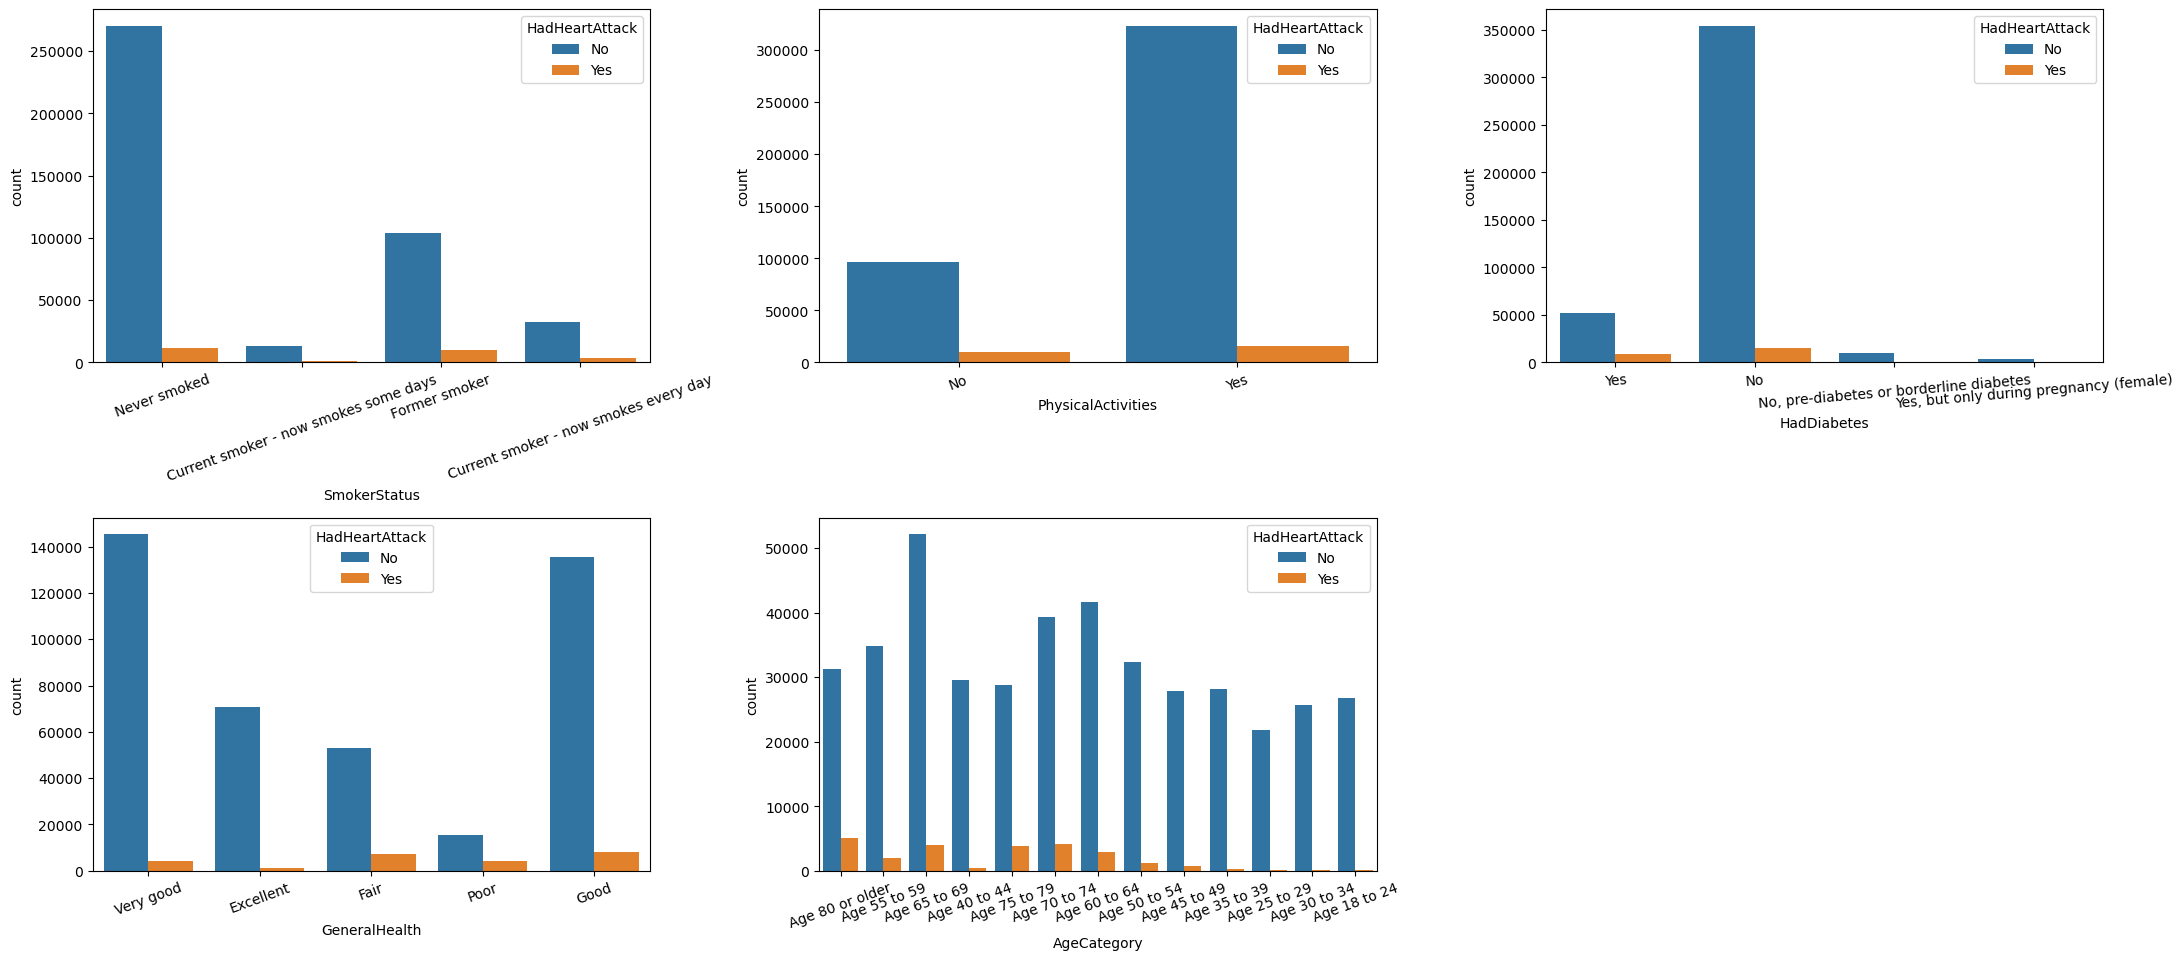

In [129]:
fig = plt.figure(figsize = (22, 14))
gs = gridspec.GridSpec(3,3)

ax1 = fig.add_subplot(gs[0,0])
sns.countplot(x='SmokerStatus', hue='HadHeartAttack', data=df)
ax1.tick_params(axis = 'x', rotation = 20)

ax2 = fig.add_subplot(gs[0,1])
sns.countplot(x='PhysicalActivities', hue='HadHeartAttack', data=df)
ax2.tick_params(axis = 'x', rotation = 20)

ax3 = fig.add_subplot(gs[0,2])
sns.countplot(x='HadDiabetes', hue='HadHeartAttack', data=df)
ax3.tick_params(axis = 'x', rotation = 5)

ax4 = fig.add_subplot(gs[1,0])
sns.countplot(x='GeneralHealth', hue='HadHeartAttack', data=df)
ax4.tick_params(axis = 'x', rotation = 20)

ax5 = fig.add_subplot(gs[1,1])
sns.countplot(x='AgeCategory', hue='HadHeartAttack', data=df)
ax5.tick_params(axis = 'x', rotation = 20)

plt.tight_layout()

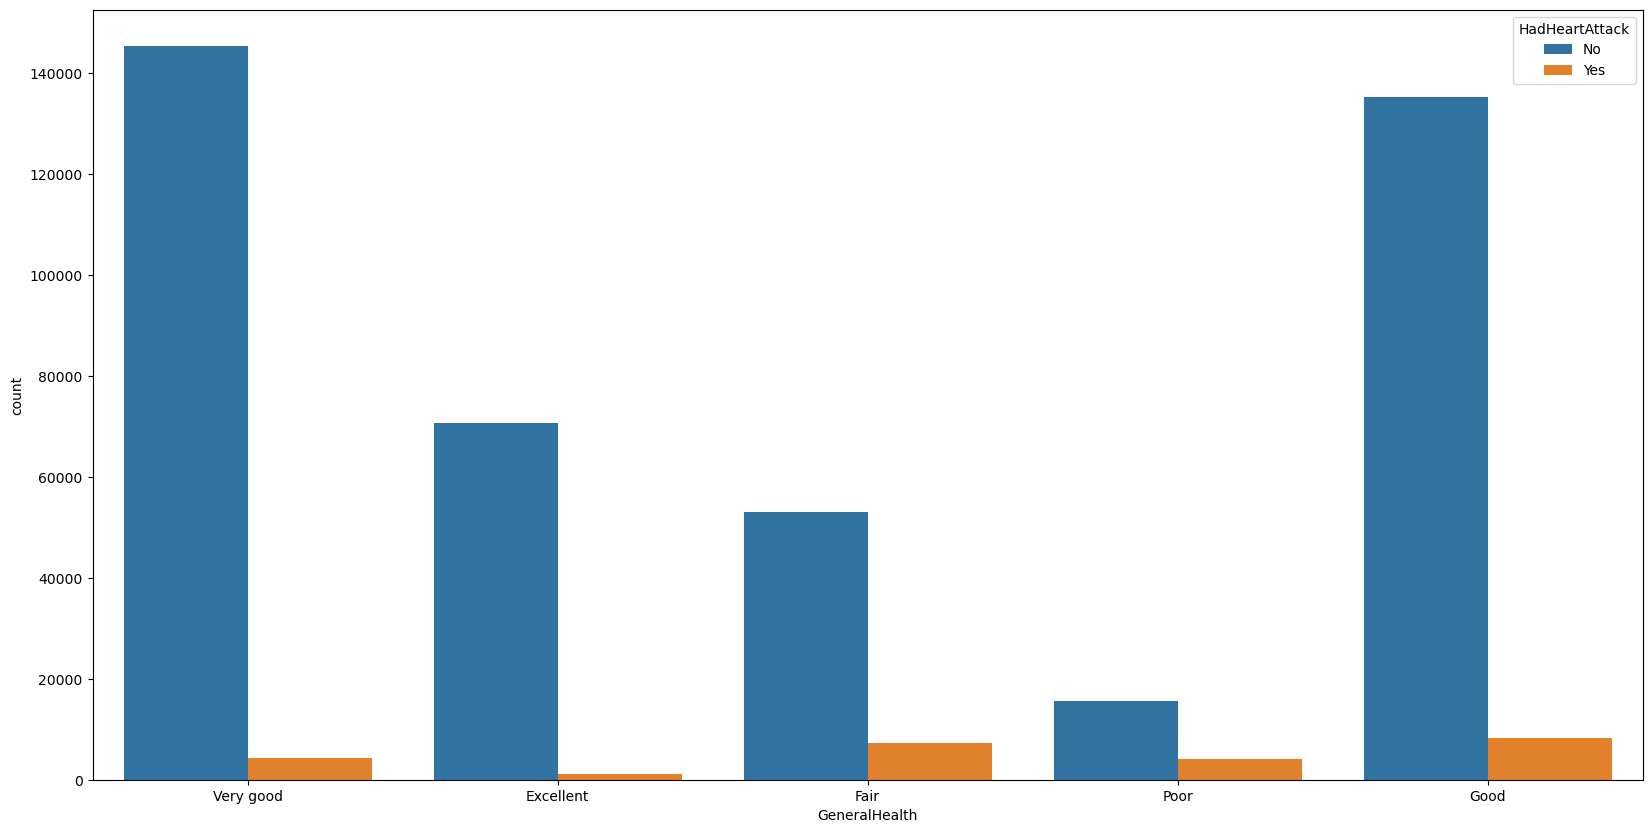

In [130]:
gr = gridspec.GridSpec(3,3)
fig = plt.figure(figsize = (20, 10))
axf = fig.add_subplot(gr[0:])
sns.countplot(x = 'GeneralHealth', hue = 'HadHeartAttack', data = df)
plt.show()

### ENCODING

In [132]:
# now to encode all the categorical columns 

# iam label encoding all the columns with two unique values.
# iam one hot encoding all the columns with more than two unique values.

In [133]:
len(cat_col)

33

In [134]:
# categorical columns to encode: 34

In [135]:
less_unq = []
more_unq = []
for i in cat_col:
    if df1[i].nunique() <= 2:
        less_unq.append(i)
    else:
        more_unq.append(i)

print(len(less_unq), less_unq)
print(len(more_unq), more_unq)

23 ['Sex', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear']
10 ['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'TetanusLast10Tdap', 'CovidPos']


In [136]:
# one hot encoded columns


ohe = OneHotEncoder()


trans_list = [
    ('ohe', OneHotEncoder(sparse_output = False), ['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'TetanusLast10Tdap', 'CovidPos'])
]

ct = ColumnTransformer(transformers = trans_list, remainder = 'passthrough', verbose_feature_names_out = False).set_output(transform = 'pandas')
# df2 is the dataframe name of the cleanded dataframe with encoded values.

df2 = ct.fit_transform(df1)
df2.head()

,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,LastCheckupTime_5 or more years ago,LastCheckupTime_Within past 2 years (1 year but less than 2 years ago),LastCheckupTime_Within past 5 years (2 years but less than 5 years ago),LastCheckupTime_Within past year (anytime less than 12 months ago),RemovedTeeth_1 to 5,"RemovedTeeth_6 or more, but not all",RemovedTeeth_All,RemovedTeeth_None of them,HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,ECigaretteUsage_Never used e-cigarettes in my entire life,ECigaretteUsage_Not at all (right now),ECigaretteUsage_Use them every day,ECigaretteUsage_Use them some days,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AgeCategory_Age 18 to 24,AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Female,0.0,0.0,No,8.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1.70269,83.074632,27.44,No,No,Yes,No,No
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Female,0.0,0.0,No,6.0,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1.60000,68.040000,26.57,No,No,No,No,No
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Female,2.0,3.0,Yes,5.0,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1.57000,63.500000,25.61,No,No,No,No,No
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Female,0.0,0.0,Yes,7.0,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,Yes,1.65000,63.500000,23.30,No,No,Yes,Yes,No
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Female,2.0,0.0,Yes,9.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1.57000,53.980000,21.77,Yes,No,No,Yes,No


In [137]:
# label encoded columns

le = LabelEncoder()

le_columns = ['Sex', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear']

for i in le_columns:
    df2[i] = le.fit_transform(df2[i])

df2.head()

,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,LastCheckupTime_5 or more years ago,LastCheckupTime_Within past 2 years (1 year but less than 2 years ago),LastCheckupTime_Within past 5 years (2 years but less than 5 years ago),LastCheckupTime_Within past year (anytime less than 12 months ago),RemovedTeeth_1 to 5,"RemovedTeeth_6 or more, but not all",RemovedTeeth_All,RemovedTeeth_None of them,HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,ECigaretteUsage_Never used e-cigarettes in my entire life,ECigaretteUsage_Not at all (right now),ECigaretteUsage_Use them every day,ECigaretteUsage_Use them some days,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AgeCategory_Age 18 to 24,AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.70269,83.074632,27.44,0,0,1,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0,6.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.60000,68.040000,26.57,0,0,0,0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2.0,3.0,1,5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.57000,63.500000,25.61,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,1,7.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1.65000,63.500000,23.30,0,0,1,1,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,2.0,0.0,1,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.57000,53.980000,21.77,1,0,0,1,0


In [138]:
df2['Sex'].value_counts()

Sex
0    167932
1    158497
Name: count, dtype: int64

In [139]:
# the above proves that we have successfully finished the encoding process for our dataset
# now we shall check the no of increase in columns

df2.shape

(326429, 79)

In [140]:
# the columns have outrageously increased from mere 40 to 79 afer encoding.

In [141]:
# iam performing column name changes (i observed this error while doing light gb model,
# since it couldnt accept the column names with certain characters, i am changing those character hear itself 
# this will stop creating error as i go further into model building.)

In [142]:
df2.columns = df2.columns.str.replace('[,()"]+', '_', regex=True).str.replace('\s+', '_', regex=True).str.strip()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\persi\AppData\Local\Temp\ipykernel_12468\4039969784.py:1: SyntaxWarning: invalid escape sequence '\s'
  df2.columns = df2.columns.str.replace('[,()"]+', '_', regex=True).str.replace('\s+', '_', regex=True).str.strip()


In [143]:
# hopefully this wont create any further disturbances as i move forward with model building.

### *TRAIN TEST SPLIT*

In [145]:
# BEFORE performing transformation and scaling i would like to do train test split.
# we are going to perfrom train test split on the cleanded and encoded dataframe named df2.

# before that we are going to choose our target variable.

df2.head()

,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very_good,LastCheckupTime_5_or_more_years_ago,LastCheckupTime_Within_past_2_years__1_year_but_less_than_2_years_ago_,LastCheckupTime_Within_past_5_years__2_years_but_less_than_5_years_ago_,LastCheckupTime_Within_past_year__anytime_less_than_12_months_ago_,RemovedTeeth_1_to_5,RemovedTeeth_6_or_more__but_not_all,RemovedTeeth_All,RemovedTeeth_None_of_them,HadDiabetes_No,HadDiabetes_No__pre-diabetes_or_borderline_diabetes,HadDiabetes_Yes,HadDiabetes_Yes__but_only_during_pregnancy__female_,SmokerStatus_Current_smoker_-_now_smokes_every_day,SmokerStatus_Current_smoker_-_now_smokes_some_days,SmokerStatus_Former_smoker,SmokerStatus_Never_smoked,ECigaretteUsage_Never_used_e-cigarettes_in_my_entire_life,ECigaretteUsage_Not_at_all__right_now_,ECigaretteUsage_Use_them_every_day,ECigaretteUsage_Use_them_some_days,RaceEthnicityCategory_Black_only__Non-Hispanic,RaceEthnicityCategory_Hispanic,RaceEthnicityCategory_Multiracial__Non-Hispanic,RaceEthnicityCategory_Other_race_only__Non-Hispanic,RaceEthnicityCategory_White_only__Non-Hispanic,AgeCategory_Age_18_to_24,AgeCategory_Age_25_to_29,AgeCategory_Age_30_to_34,AgeCategory_Age_35_to_39,AgeCategory_Age_40_to_44,AgeCategory_Age_45_to_49,AgeCategory_Age_50_to_54,AgeCategory_Age_55_to_59,AgeCategory_Age_60_to_64,AgeCategory_Age_65_to_69,AgeCategory_Age_70_to_74,AgeCategory_Age_75_to_79,AgeCategory_Age_80_or_older,TetanusLast10Tdap_No__did_not_receive_any_tetanus_shot_in_the_past_10_years,TetanusLast10Tdap_Yes__received_Tdap,TetanusLast10Tdap_Yes__received_tetanus_shot_but_not_sure_what_type,TetanusLast10Tdap_Yes__received_tetanus_shot__but_not_Tdap,CovidPos_No,CovidPos_Tested_positive_using_home_test_without_a_health_professional,CovidPos_Yes,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.70269,83.074632,27.44,0,0,1,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0,6.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.60000,68.040000,26.57,0,0,0,0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2.0,3.0,1,5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.57000,63.500000,25.61,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,1,7.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1.65000,63.500000,23.30,0,0,1,1,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,2.0,0.0,1,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.57000,53.980000,21.77,1,0,0,1,0


In [146]:
df2.shape

(326429, 79)

In [147]:

df['HadHeartAttack'].value_counts(normalize = True)*100

HadHeartAttack
No     94.357436
Yes     5.642564
Name: proportion, dtype: float64

In [148]:
df['HadHeartAttack'].value_counts()

HadHeartAttack
No     419867
Yes     25108
Name: count, dtype: int64

In [149]:
# from this dataset since its a classification problem, Iam choosing the column 'HAD HEART ATTACK' as my target column.

In [150]:
x = df2.drop(columns = 'HadHeartAttack', axis = 1)
y = df2['HadHeartAttack']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

### UNDERSAMPLING MINORITY 25% AND MAJORITY 75%

In [152]:

from imblearn.under_sampling import RandomUnderSampler

sample_ratio = 0.25/0.75

rus = RandomUnderSampler(sampling_strategy =  sample_ratio,random_state = 42)

x_resampled, y_resampled = rus.fit_resample(xtrain, ytrain)

y_resampled.value_counts(normalize = True)*100

C:\Users\persi\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\persi\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


HadHeartAttack
0    75.0
1    25.0
Name: proportion, dtype: float64

In [153]:
y_resampled.value_counts()

HadHeartAttack
0    31278
1    10426
Name: count, dtype: int64

In [154]:
len(y_resampled)

41704

In [155]:
# now that we have splitted our dataset iam going to scale the values so that, It would be possible to fit
# distance based models on my dataset.

sc = StandardScaler()

In [156]:
xtrain.shape

(228500, 78)

In [157]:
ytrain.shape

(228500,)

In [158]:
xtest.shape

(97929, 78)

In [159]:
ytest.shape

(97929,)

In [160]:
xtrain_scaled_resample = sc.fit_transform(x_resampled)
xtest_scaled = sc.transform(xtest)

In [161]:
ytrain_scaled_resample = sc.fit_transform(y_resampled.to_numpy().reshape(-1, 1))
ytest_scaled = sc.transform(ytest.to_numpy().reshape(-1, 1))

### *model fitting*

In [163]:
# since iam focusing on classification iam choosing logistic regression as my base model.

## BASE MODELS

### LOGISTIC REGRESSION

In [166]:
lgc = LogisticRegression()

In [167]:
model_lgc = lgc.fit(xtrain_scaled_resample, y_resampled)
y_pred_lgc = model_lgc.predict(xtest_scaled)
# print(classification_report(y_pred_lgc, ytest))
print(classification_report(ytest, y_pred_lgc))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     93643
           1       0.33      0.53      0.41      4286

    accuracy                           0.93     97929
   macro avg       0.65      0.74      0.69     97929
weighted avg       0.95      0.93      0.94     97929



In [168]:
# ok undersampling worked and there is a huge percentage increate in recall i.e 
# from 17 to 33 %

#### AUC AND ROC CURVE 

In [170]:
# check

from sklearn.metrics import roc_auc_score, roc_curve

In [171]:
# check

fpr, tpr, threshold = roc_curve(ytest, y_pred_lgc)

In [172]:
y_pred_proba = model_lgc.predict_proba(xtest)[:, 1]
print(y_pred_proba)

[0.99972145 0.99445205 0.99999857 ... 0.99999439 0.99989463 0.99069602]


C:\Users\persi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [173]:
print(fpr)

[0.         0.04945378 1.        ]


In [174]:
print(tpr)

[0.         0.53289781 1.        ]


In [175]:
print(threshold)

[inf  1.  0.]


In [176]:
auc_score = roc_auc_score(ytest, y_pred_proba)
print(auc_score)

0.6524860959491666


In [177]:
# the auc score of the model is 0.6 which states that the model performance is poor.

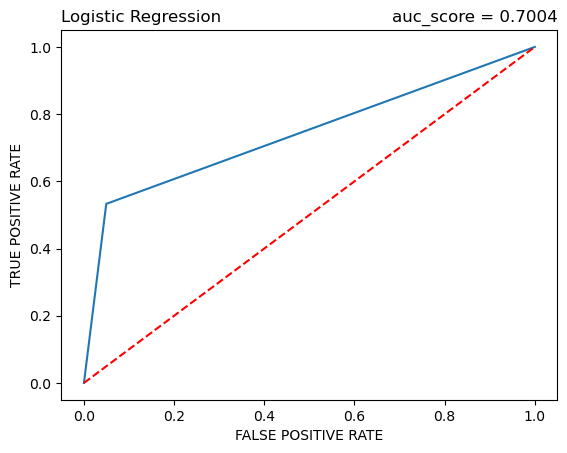

In [178]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle = '--', color = 'red')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('auc_score = 0.7004',loc = 'right')
plt.title('Logistic Regression', loc = 'left')
plt.show()

### K NEAREST NEIGHBORS

In [180]:
from sklearn.neighbors import KNeighborsClassifier

In [181]:
knn = KNeighborsClassifier()

In [182]:
model_knn = knn.fit(xtrain_scaled_resample, y_resampled)

In [183]:
y_pred_knn = model_knn.predict(xtest)

C:\Users\persi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [184]:
print(classification_report(ytest, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     93643
           1       0.10      0.25      0.15      4286

    accuracy                           0.87     97929
   macro avg       0.53      0.58      0.54     97929
weighted avg       0.93      0.87      0.90     97929



In [185]:
y_pred_proba_knn = model_knn.predict_proba(xtest)[:, 1]

C:\Users\persi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [186]:
auc_score = roc_auc_score(ytest, y_pred_proba_knn)

In [187]:
print(auc_score)

0.6119344815731675


In [188]:
fpr2, tpr2, threshold2 = roc_curve(ytest, y_pred_knn)

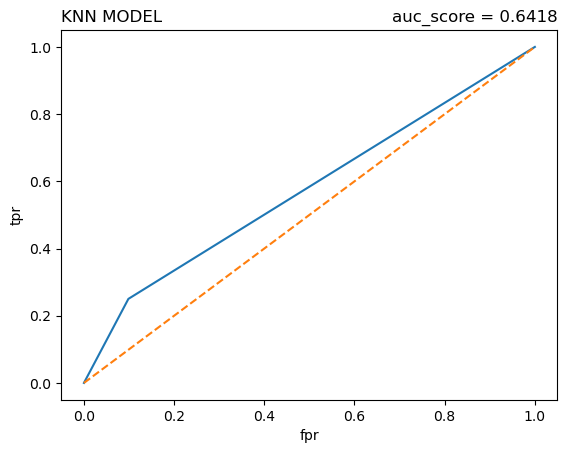

In [189]:
plt.plot(fpr2, tpr2)
plt.plot([0,1], [0,1], linestyle = '--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN MODEL', loc = 'left')
plt.title('auc_score = 0.6418', loc = 'right')
plt.show()

### NAIVE BAYES MODEL

In [191]:
from sklearn.naive_bayes import GaussianNB

In [192]:
gnb = GaussianNB()

In [193]:
model_gnb = gnb.fit(xtrain_scaled_resample, y_resampled)

In [194]:
y_pred_gnb = model_gnb.predict(xtest)

C:\Users\persi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [195]:
print(classification_report(ytest, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     93643
           1       0.04      1.00      0.08      4286

    accuracy                           0.04     97929
   macro avg       0.02      0.50      0.04     97929
weighted avg       0.00      0.04      0.00     97929



C:\Users\persi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\persi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\persi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### PARAMETER TUNED MODELS

#### PARAMETER TUNED KNN MODEL(USING RANDOMISED SEARCH CV)

In [198]:
# For all my models i will be using randomized search cv as its fast and almost efficient as gridsearch cv.

In [199]:
from sklearn.model_selection import RandomizedSearchCV

In [200]:
params_list = {
    'n_neighbors': list(range(1,5)),
    'p': [1,2]
}

In [201]:
rcv = RandomizedSearchCV(estimator = knn, param_distributions = params_list, cv= 3, n_iter = 5, scoring = 'f1', random_state = 42) # for k nearest neighbors

In [202]:
rcv.fit(xtrain_scaled_resample, y_resampled)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=5,
                   param_distributions={'n_neighbors': [1, 2, 3, 4],
                                        'p': [1, 2]},
                   random_state=42, scoring='f1')

In [203]:
rcv.best_params_

{'p': 2, 'n_neighbors': 3}

In [204]:
knn2 = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'minkowski')

In [205]:
model_knn2 = knn2.fit(xtrain_scaled_resample, y_resampled)

In [206]:
y_pred_knn2 = model_knn2.predict(xtest)

C:\Users\persi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [207]:
print(classification_report(ytest, y_pred_knn2))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83     93643
           1       0.06      0.35      0.10      4286

    accuracy                           0.71     97929
   macro avg       0.51      0.54      0.46     97929
weighted avg       0.92      0.71      0.80     97929



### LIGHT GB MODEL

In [209]:
# !pip install lightgbm

In [210]:
from lightgbm import LGBMClassifier

In [211]:
# Replace problematic characters with underscores and strip whitespace
# x_resampled.columns = x_resampled.columns.str.replace('[,()"]+', '_', regex=True).str.replace('\s+', '_', regex=True).str.strip()

In [212]:
lgb = LGBMClassifier()

In [213]:
model_lgb = lgb.fit(x_resampled, y_resampled)

[LightGBM] [Info] Number of positive: 10426, number of negative: 31278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 41704, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612


In [214]:
y_pred_lgb = model_lgb.predict(xtest)

In [215]:
print(classification_report(ytest, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     93643
           1       0.30      0.56      0.39      4286

    accuracy                           0.92     97929
   macro avg       0.64      0.75      0.68     97929
weighted avg       0.95      0.92      0.93     97929



In [216]:
#### paramter tuned LGB model

In [217]:
# from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]
}


rcv_lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params, cv= 3, n_iter = 5, scoring = 'f1', random_state = 42) # for k nearest neighbors

rcv_lgb.fit(x_resampled, y_resampled)

[LightGBM] [Info] Number of positive: 6950, number of negative: 20852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 27802, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.249982 -> initscore=-1.098708
[LightGBM] [Info] Start training from score -1.098708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 300, 500],
                                        'num_leaves': [15, 31, 63],
                                        'reg_alpha': [0, 0.1],
                                        'reg_lambda': [0, 0.1]},
                   random_state=42, scoring='f1')

In [218]:
rcv_lgb.best_params_

{'reg_lambda': 0,
 'reg_alpha': 0,
 'num_leaves': 15,
 'n_estimators': 500,
 'max_depth': 3,
 'learning_rate': 0.05}

In [219]:
lgb_opt = LGBMClassifier( reg_lambda = 0.1,
 reg_alpha= 0,
 num_leaves= 31,
 n_estimators= 500,
 max_depth= 3,
 learning_rate= 0.05)

In [220]:
model_lgb_opt = lgb_opt.fit(x_resampled, y_resampled)

[LightGBM] [Info] Number of positive: 10426, number of negative: 31278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 41704, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [221]:
y_pred_lgb_opt = model_lgb_opt.predict(xtest)

In [222]:
print(classification_report(ytest, y_pred_lgb_opt))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     93643
           1       0.32      0.55      0.40      4286

    accuracy                           0.93     97929
   macro avg       0.65      0.75      0.68     97929
weighted avg       0.95      0.93      0.94     97929



### USING ENSEMBLE MODELS

### *random forest classifier*

In [225]:
from sklearn.ensemble import RandomForestClassifier

In [226]:
rfc = RandomForestClassifier()

In [227]:
# xtest.columns = xtest.columns.str.replace('[,()"]+', '_', regex=True).str.replace('\s+', '_', regex=True).str.strip()

In [228]:
model_rfc = rfc.fit(x_resampled, y_resampled)

In [229]:
y_pred_rfc = model_rfc.predict(xtest)

In [230]:
print(classification_report(ytest, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     93643
           1       0.32      0.53      0.40      4286

    accuracy                           0.93     97929
   macro avg       0.65      0.74      0.68     97929
weighted avg       0.95      0.93      0.94     97929



In [231]:
### parameter tuned model

In [232]:
params_list = {
    'n_estimators': [100,150,200,250],
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,11)),
    'min_samples_leaf': list(range(1,6))
}


rcv_rfc = RandomizedSearchCV(estimator = rfc, param_distributions = params_list, cv= 3, n_iter = 5, scoring = 'f1', random_state = 42) # for k nearest neighbors

rcv_rfc.fit(x_resampled, y_resampled)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 150, 200, 250]},
                   random_state=42, scoring='f1')

In [233]:
rcv_rfc.best_params_

{'n_estimators': 150,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'criterion': 'gini'}

In [234]:
rfc_2 = RandomForestClassifier(n_estimators=150, min_samples_leaf = 4, max_depth = 5, criterion = 'gini')

In [235]:
model_rfc_2 = rfc_2.fit(x_resampled, y_resampled)

In [236]:
y_pred_rfc_2 = model_rfc_2.predict(xtest)

In [237]:
print(classification_report(ytest, y_pred_rfc_2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     93643
           1       0.43      0.41      0.42      4286

    accuracy                           0.95     97929
   macro avg       0.70      0.69      0.70     97929
weighted avg       0.95      0.95      0.95     97929



### XG BOOST MODEL

In [239]:
from xgboost import XGBClassifier

In [240]:
xgb = XGBClassifier()

In [241]:
model_xgb = xgb.fit(x_resampled, y_resampled)

In [242]:
y_pred_xgb = model_xgb.predict(xtest)

In [243]:
print(classification_report(ytest, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96     93643
           1       0.28      0.56      0.37      4286

    accuracy                           0.92     97929
   macro avg       0.63      0.75      0.66     97929
weighted avg       0.95      0.92      0.93     97929



In [244]:
# As of now i have used various models like
# logistic regression,
# knn,
# naive bayes,
# random forest
# xg boost
# ligth gb 

# reason as to why, since we all know these models are known to perform well with binary classification dataset.

In [245]:
# After this iam going to perform oversampling and use the same models mentioned above to see if theres any
# further improvement or not.

# But Iam not depending more on oversampling technique since its mostly disliked in the industry( as mentioned by my mentor)
# since using smote introduces artificial dataset, Which may make the model to overfit or create pattern in errors etc.

### OVERSAMPLING (SMOTE)

In [247]:
from imblearn.over_sampling import SMOTE

In [248]:
0.25/0.75

0.3333333333333333

In [249]:
sm = SMOTE(sampling_strategy = 0.33,random_state = 42) # 0.33 means i have taken minority ratio: 0.25 and majority class ration: 0.75

In [250]:
x_resampled_os, y_resampled_os = sm.fit_resample(xtrain, ytrain)

C:\Users\persi\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [251]:
# did it work?

y_resampled_os.value_counts(normalize = True)*100

HadHeartAttack
0    75.188079
1    24.811921
Name: proportion, dtype: float64

In [252]:
# it worked the dataset in now balanced(but i have captured the imbalance ratio so that the model understands the imbalance)

In [253]:
# NOW TO PERFROM ALL THE OPERATIONS PERFORMED FOR UNDERSAMPLNG 

### MODELS AFTER OVERSAMPLING

In [255]:
sc2 = StandardScaler()

In [256]:
xtrain_resampled_os_scaled = sc2.fit_transform(x_resampled_os)
xtest_resampled_os_scaled = sc2.transform(xtest)

In [257]:
lgc = LogisticRegression()

model_lgc = lgc.fit(xtrain_resampled_os_scaled, y_resampled_os)
y_pred_lgc = model_lgc.predict(xtest_scaled)
# print(classification_report(y_pred_lgc, ytest))
print(classification_report(ytest, y_pred_lgc))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     93643
           1       0.21      0.44      0.28      4286

    accuracy                           0.90     97929
   macro avg       0.59      0.68      0.62     97929
weighted avg       0.94      0.90      0.92     97929



In [258]:
# ok undersampling worked and there is a huge percentage increate in recall i.e 
# from 17 to 33 %

#### AUC AND ROC CURVE 

# check

In [259]:

# check

fpr, tpr, threshold = roc_curve(ytest, y_pred_lgc)

y_pred_proba = model_lgc.predict_proba(xtest)[:, 1]
print(y_pred_proba)

print(fpr)

print(tpr)

print(threshold)

auc_score = roc_auc_score(ytest, y_pred_proba)
print(auc_score)

[0.93341276 0.89776012 0.99772367 ... 0.99004987 0.9695451  0.85610011]
[0.         0.07677029 1.        ]
[0.         0.44470369 1.        ]
[inf  1.  0.]
0.6876554292242104


C:\Users\persi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


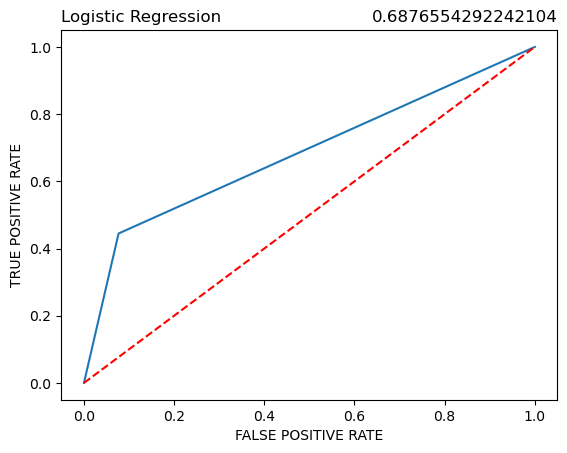

In [260]:
# the auc score of the model is 0.6 which states that the model performance is poor.

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle = '--', color = 'red')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title(auc_score,loc = 'right')
plt.title('Logistic Regression', loc = 'left')
plt.show()

C:\Users\persi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.03      0.06     93643
           1       0.04      0.94      0.08      4286

    accuracy                           0.07     97929
   macro avg       0.48      0.49      0.07     97929
weighted avg       0.89      0.07      0.06     97929



C:\Users\persi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.4131499639751848


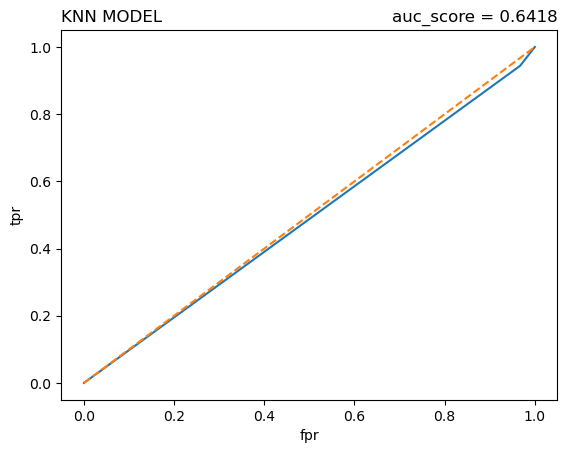

In [261]:
### K NEAREST NEIGHBORS


knn = KNeighborsClassifier()

model_knn = knn.fit(xtrain_resampled_os_scaled, y_resampled_os)

y_pred_knn = model_knn.predict(xtest)

print(classification_report(ytest, y_pred_knn))

y_pred_proba_knn = model_knn.predict_proba(xtest)[:, 1]

auc_score = roc_auc_score(ytest, y_pred_proba_knn)

print(auc_score)

fpr2, tpr2, threshold2 = roc_curve(ytest, y_pred_knn)

plt.plot(fpr2, tpr2)
plt.plot([0,1], [0,1], linestyle = '--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN MODEL', loc = 'left')
plt.title('auc_score = 0.6418', loc = 'right')
plt.show()

In [262]:
### NAIVE BAYES MODEL


gnb = GaussianNB()

model_gnb = gnb.fit(xtrain_resampled_os_scaled, y_resampled_os)

y_pred_gnb = model_gnb.predict(xtest)

print(classification_report(ytest, y_pred_gnb))

### PARAMETER TUNED MODELS

C:\Users\persi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     93501
           1       0.05      1.00      0.09      4428

    accuracy                           0.05     97929
   macro avg       0.02      0.50      0.04     97929
weighted avg       0.00      0.05      0.00     97929



C:\Users\persi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\persi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\persi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#### PARAMETER TUNED KNN MODEL(USING RANDOMISED SEARCH CV)

# For all my models i will be using randomized search cv as its fast and almost efficient as gridsearch cv.


params_list = {
    'n_neighbors': list(range(1,5)),
    'p': [1,2]
}

rcv = RandomizedSearchCV(estimator = knn, param_distributions = params_list, cv= 3, n_iter = 5, scoring = 'f1', random_state = 42) # for k nearest neighbors

rcv.fit(xtrain_resampled_os_scaled, y_resampled_os)

rcv.best_params_

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'minkowski')

model_knn2 = knn2.fit(xtrain_resampled_os_scaled, y_resampled_os)

y_pred_knn2 = model_knn2.predict(xtest)

print(classification_report(ytest, y_pred_knn2))

In [ ]:
### LIGHT GB MODEL

# !pip install lightgbm


# Replace problematic characters with underscores and strip whitespace
# x_resampled.columns = x_resampled.columns.str.replace('[,()"]+', '_', regex=True).str.replace('\s+', '_', regex=True).str.strip()

lgb = LGBMClassifier()

model_lgb = lgb.fit(x_resampled_os, y_resampled_os)

y_pred_lgb = model_lgb.predict(xtest)

print(classification_report(ytest, y_pred_lgb))

In [ ]:
#### paramter tuned LGB model

# from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]
}


rcv_lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params, cv= 3, n_iter = 5, scoring = 'f1', random_state = 42) # for k nearest neighbors

rcv_lgb.fit(x_resampled_os, y_resampled_os)

rcv_lgb.best_params_

lgb_opt = LGBMClassifier( reg_lambda = 0.1,
 reg_alpha= 0,
 num_leaves= 31,
 n_estimators= 500,
 max_depth= 3,
 learning_rate= 0.05)

model_lgb_opt = lgb_opt.fit(x_resampled_os, y_resampled_os)

y_pred_lgb_opt = model_lgb_opt.predict(xtest)

print(classification_report(ytest, y_pred_lgb_opt))

In [ ]:
### USING ENSEMBLE MODELS

### *random forest classifier*


rfc = RandomForestClassifier()

# xtest.columns = xtest.columns.str.replace('[,()"]+', '_', regex=True).str.replace('\s+', '_', regex=True).str.strip()

model_rfc = rfc.fit(x_resampled_os, y_resampled_os)

y_pred_rfc = model_rfc.predict(xtest)

print(classification_report(ytest, y_pred_rfc))

In [ ]:
### parameter tuned model

params_list = {
    'n_estimators': [100,150,200,250],
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,11)),
    'min_samples_leaf': list(range(1,6))
}


rcv_rfc = RandomizedSearchCV(estimator = rfc, param_distributions = params_list, cv= 3, n_iter = 5, scoring = 'f1', random_state = 42) # for k nearest neighbors

rcv_rfc.fit(x_resampled, y_resampled)

rcv_rfc.best_params_

rfc_2 = RandomForestClassifier(n_estimators=150, min_samples_leaf = 4, max_depth = 5, criterion = 'gini')

model_rfc_2 = rfc_2.fit(x_resampled_os, y_resampled_os)

y_pred_rfc_2 = model_rfc_2.predict(xtest)

print(classification_report(ytest, y_pred_rfc_2))

In [ ]:
### XG BOOST MODEL


xgb = XGBClassifier()

model_xgb = xgb.fit(x_resampled_os, y_resampled_os)

y_pred_xgb = model_xgb.predict(xtest)

print(classification_report(ytest, y_pred_xgb))